In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)

In [2]:
import torch
  
print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
  
# Storing ID of current CUDA device
cuda_id = torch.cuda.current_device()
print(f"ID of current CUDA device:{torch.cuda.current_device()}")
        
print(f"Name of current CUDA device: {torch.cuda.get_device_name(cuda_id)}")

Is CUDA supported by this system? True
CUDA version: 10.1
ID of current CUDA device:0
Name of current CUDA device: NVIDIA GeForce RTX 2060


In [3]:
branded_foods = pd.read_csv("F:/Chromet Download/branded_food.csv", sep=";", on_bad_lines='skip', low_memory=False)
##food_nutrients = pd.read_csv("F:/Chromet Download/food_nutrient.csv", low_memory=False)
##nutrient = pd.read_csv("F:/Chromet Download/nutrient.csv")
ingredients = pd.read_csv("F:/Chromet Download/level_one_ingredients.csv")

In [4]:
branded_foods.head()

,fdc_id,brand_owner,brand_name,subbrand_name,gtin_upc,ingredients,not_a_significant_source_of,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel
0,1105904,Richardson Oilseed Products (US) Limited,NaN,NaN,00027000612323,Vegetable Oil,NaN,15,ml,NaN,Oils Edible,GDSN,NaN,2020-10-02 00:00:00,2020-11-13 00:00:00,United States,NaN,NaN,NaN
1,1105905,CAMPBELL SOUP COMPANY,NaN,NaN,00051000198808,"INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...",NaN,240,ml,NaN,Herbs/Spices/Extracts,GDSN,NaN,2020-09-12 00:00:00,2020-11-13 00:00:00,United States,NaN,NaN,NaN
2,1105906,CAMPBELL SOUP COMPANY,NaN,NaN,00051000213273,"INGREDIENTS: CLAM STOCK, POTATOES, CLAMS, CREA...",NaN,440,g,NaN,Prepared Soups,GDSN,NaN,2020-09-01 00:00:00,2020-11-13 00:00:00,United States,NaN,NaN,NaN
3,1105907,CAMPBELL SOUP COMPANY,NaN,NaN,00051000213303,"INGREDIENTS: WATER, CREAM, BROCCOLI, CELERY, V...",NaN,440,g,NaN,Prepared Soups,GDSN,NaN,2020-09-01 00:00:00,2020-11-13 00:00:00,United States,NaN,NaN,NaN
4,1105908,CAMPBELL SOUP COMPANY,NaN,NaN,00051000224637,"INGREDIENTS: CHICKEN STOCK, CONTAINS LESS THAN...",NaN,240,ml,NaN,Herbs/Spices/Extracts,GDSN,NaN,2020-10-03 00:00:00,2020-11-13 00:00:00,United States,NaN,NaN,NaN


In [5]:
branded_foods = branded_foods.drop(columns = ['gtin_upc','data_source','modified_date','available_date','market_country','discontinued_date','preparation_state_code','trade_channel'] )

In [6]:
branded_foods

,fdc_id,brand_owner,brand_name,subbrand_name,ingredients,not_a_significant_source_of,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,package_weight
0,1105904,Richardson Oilseed Products (US) Limited,NaN,NaN,Vegetable Oil,NaN,15,ml,NaN,Oils Edible,NaN
1,1105905,CAMPBELL SOUP COMPANY,NaN,NaN,"INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...",NaN,240,ml,NaN,Herbs/Spices/Extracts,NaN
2,1105906,CAMPBELL SOUP COMPANY,NaN,NaN,"INGREDIENTS: CLAM STOCK, POTATOES, CLAMS, CREA...",NaN,440,g,NaN,Prepared Soups,NaN
3,1105907,CAMPBELL SOUP COMPANY,NaN,NaN,"INGREDIENTS: WATER, CREAM, BROCCOLI, CELERY, V...",NaN,440,g,NaN,Prepared Soups,NaN
4,1105908,CAMPBELL SOUP COMPANY,NaN,NaN,"INGREDIENTS: CHICKEN STOCK, CONTAINS LESS THAN...",NaN,240,ml,NaN,Herbs/Spices/Extracts,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1627241,2257038,Trident Seafoods Corp.,Trident Seafoods,NaN,"FISH 71.5% (ALASKA POLLOCK), BATTER AND BREADI...",NaN,102,g,1 PIECE (102 g/3.6 oz),Fish Prepared/Processed,10 LBR
1627242,2257039,Trident Seafoods Corp.,Ocean Treasures™,Trident Seafoods,67.04% FISH (ALASKA POLLOCK AND COD) 32.96% BA...,NaN,113,g,4 pieces (113 g/4 oz),Fish Prepared/Processed,10 LBR
1627243,2257040,Trident Seafoods Corp.,Trident Seafoods,NaN,"71.3% FISH (ALASKA POLLOCK), 28.7% BATTER & BR...",NaN,102,g,1 PIECE (102 g/3.6 oz),Fish Prepared/Processed,25 LBR
1627244,2257041,Trident Seafoods Corp.,Trident Seafoods,NaN,"71.3% FISH (ALASKA POLLOCK), 28.7% BATTER & BR...",NaN,102,g,1 PIECE (102 g),Fish Prepared/Processed,10 LBR


In [7]:
branded_foods.dtypes

fdc_id                          int64
brand_owner                    object
brand_name                     object
subbrand_name                  object
ingredients                    object
not_a_significant_source_of    object
serving_size                   object
serving_size_unit              object
household_serving_fulltext     object
branded_food_category          object
package_weight                 object
dtype: object

In [8]:
branded_foods['package_weight'].unique()

array([nan, '1.25 LBR', '2019-04-01 00:00:00', ..., '150 1N', '20.24 LBR',
       '157.5 ONZ'], dtype=object)

In [9]:
branded_foods['branded_food_category'].nunique()

332

In [10]:
count = branded_foods.branded_food_category.value_counts()
print(count)

Popcorn, Peanuts, Seeds & Related Snacks                              77174
Candy                                                                 76239
Cheese                                                                63604
Ice Cream & Frozen Yogurt                                             50034
Cookies & Biscuits                                                    47478
                                                                      ...  
Frozen Pies/Savouries                                                     1
2019-04-01 00:00:00                                                       1
Baking/Cooking Mixes/Supplies Variety Packs                               1
Dough Based Products / Meals - Not Ready to Eat - Savoury (Frozen)        1
Fresh Pasta                                                               1
Name: branded_food_category, Length: 332, dtype: int64


<AxesSubplot:>

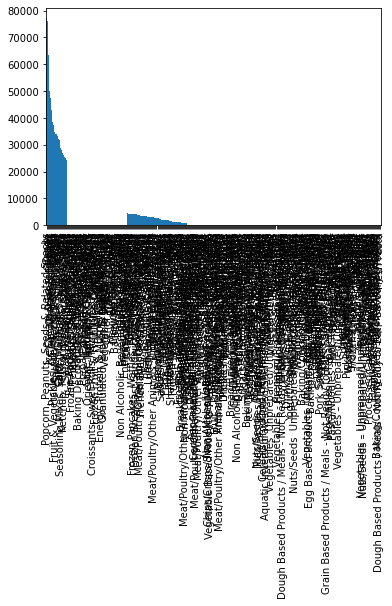

In [11]:
count.plot(kind = 'bar')

In [12]:
branded_foods_10kplus = branded_foods[~branded_foods.branded_food_category.isin(count[count < 10000].index)]

In [13]:
count1 = branded_foods_10kplus.branded_food_category.value_counts()
print(count1)

Popcorn, Peanuts, Seeds & Related Snacks             77174
Candy                                                76239
Cheese                                               63604
Ice Cream & Frozen Yogurt                            50034
Cookies & Biscuits                                   47478
Chips, Pretzels & Snacks                             42832
Breads & Buns                                        38557
Pickles, Olives, Peppers & Relishes                  37398
Fruit & Vegetable Juice, Nectars & Fruit Drinks      34843
Cereal                                               34097
Snack, Energy & Granola Bars                         33924
Chocolate                                            33354
Yogurt                                               32086
Cakes, Cupcakes, Snack Cakes                         31789
Seasoning Mixes, Salts, Marinades & Tenderizers      28793
Soda                                                 27935
Other Snacks                                         267

<AxesSubplot:>

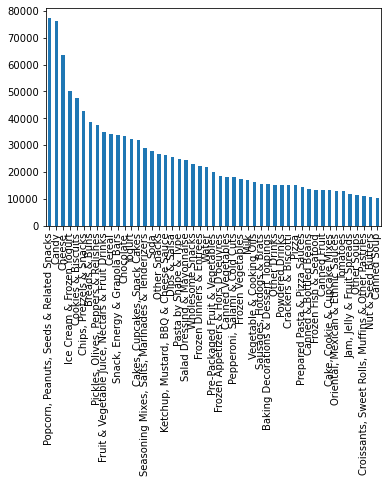

In [14]:
count1.plot(kind='bar')

In [45]:
ingredients.nunique()

fdc_id     1623370
ordinal        130
name         92566
dtype: int64

In [16]:
ingredients.name.value_counts()

SALT                                                   681450
SUGAR                                                  556901
WATER                                                  510669
NATURAL FLAVOR                                         435548
CITRIC ACID                                            297918
                                                        ...  
WHEY GLUTEN                                                 1
CONTAINS OF LESS OF CORN SYRUP                              1
NONFAT MILK. BHT                                            1
CONTAIN TWO PERCENT OR LESS OF MODIFIED CORN STARCH         1
0. TETRASODIUM PYROPHOSPHATE                                1
Name: name, Length: 92566, dtype: int64

In [17]:
food_ingredient = pd.merge(branded_foods, ingredients, on="fdc_id", how="left")


In [18]:
food_ingredient

,fdc_id,brand_owner,brand_name,subbrand_name,ingredients,not_a_significant_source_of,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,package_weight,ordinal,name
0,1105904,Richardson Oilseed Products (US) Limited,NaN,NaN,Vegetable Oil,NaN,15,ml,NaN,Oils Edible,NaN,0.0,VEGETABLE OIL
1,1105905,CAMPBELL SOUP COMPANY,NaN,NaN,"INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...",NaN,240,ml,NaN,Herbs/Spices/Extracts,NaN,0.0,BEEF STOCK
2,1105905,CAMPBELL SOUP COMPANY,NaN,NaN,"INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...",NaN,240,ml,NaN,Herbs/Spices/Extracts,NaN,5.0,CANE SUGAR
3,1105905,CAMPBELL SOUP COMPANY,NaN,NaN,"INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...",NaN,240,ml,NaN,Herbs/Spices/Extracts,NaN,2.0,SALT
4,1105905,CAMPBELL SOUP COMPANY,NaN,NaN,"INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...",NaN,240,ml,NaN,Herbs/Spices/Extracts,NaN,1.0,MIREPOIX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15463517,2257042,Trident Seafoods Corp.,Ocean Treasures,Trident Seafoods,"67.04% FISH (ALASKA POLLOCK AND COD), 32.96% B...",NaN,113,g,4 pieces (113 g/4 oz),Fish Prepared/Processed,10 LBR,5.0,SOY
15463518,2257042,Trident Seafoods Corp.,Ocean Treasures,Trident Seafoods,"67.04% FISH (ALASKA POLLOCK AND COD), 32.96% B...",NaN,113,g,4 pieces (113 g/4 oz),Fish Prepared/Processed,10 LBR,0.0,FISH
15463519,2257042,Trident Seafoods Corp.,Ocean Treasures,Trident Seafoods,"67.04% FISH (ALASKA POLLOCK AND COD), 32.96% B...",NaN,113,g,4 pieces (113 g/4 oz),Fish Prepared/Processed,10 LBR,1.0,BATTER
15463520,2257042,Trident Seafoods Corp.,Ocean Treasures,Trident Seafoods,"67.04% FISH (ALASKA POLLOCK AND COD), 32.96% B...",NaN,113,g,4 pieces (113 g/4 oz),Fish Prepared/Processed,10 LBR,4.0,WHEAT


In [19]:
ingredients = ingredients.sort_values(['fdc_id', 'ordinal'])

In [21]:
ingredients.head(15)

,fdc_id,ordinal,name
7,344604,0,TOMATO
4,344604,1,TOMATO JUICE
10,344604,2,SALT
5,344604,3,DRIED ONION
8,344604,4,DRIED GARLIC
1,344604,5,SOYBEAN OIL
6,344604,6,SPICES
2,344604,7,CALCIUM CHLORIDE
9,344604,8,NATURAL FLAVOR
0,344604,9,OLIVE OIL


In [43]:
count2 = ingredients.ordinal.value_counts().head(30)

<AxesSubplot:>

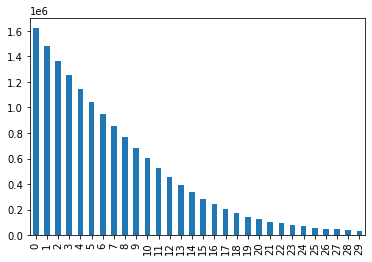

In [44]:
count2.plot(kind='bar')

In [24]:
ingredients_pivot = ingredients.pivot(index='fdc_id', columns='ordinal', values='name')
ingredients_pivot.columns = ['ingredient_'+str(col) for col in ingredients_pivot.columns]

In [25]:
ingredients_pivot = ingredients_pivot.reset_index()

In [26]:
ingredients_pivot

,fdc_id,ingredient_0,ingredient_1,ingredient_2,ingredient_3,ingredient_4,ingredient_5,ingredient_6,ingredient_7,ingredient_8,ingredient_9,ingredient_10,ingredient_11,ingredient_12,ingredient_13,ingredient_14,ingredient_15,ingredient_16,ingredient_17,ingredient_18,ingredient_19,ingredient_20,ingredient_21,ingredient_22,ingredient_23,ingredient_24,ingredient_25,ingredient_26,ingredient_27,ingredient_28,ingredient_29,ingredient_30,ingredient_31,ingredient_32,ingredient_33,ingredient_34,ingredient_35,ingredient_36,ingredient_37,ingredient_38,ingredient_39,ingredient_40,ingredient_41,ingredient_42,ingredient_43,ingredient_44,ingredient_45,ingredient_46,ingredient_47,ingredient_48,...,ingredient_80,ingredient_81,ingredient_82,ingredient_83,ingredient_84,ingredient_85,ingredient_86,ingredient_87,ingredient_88,ingredient_89,ingredient_90,ingredient_91,ingredient_92,ingredient_93,ingredient_94,ingredient_95,ingredient_96,ingredient_97,ingredient_98,ingredient_99,ingredient_100,ingredient_101,ingredient_102,ingredient_103,ingredient_104,ingredient_105,ingredient_106,ingredient_107,ingredient_108,ingredient_109,ingredient_110,ingredient_111,ingredient_112,ingredient_113,ingredient_114,ingredient_115,ingredient_116,ingredient_117,ingredient_118,ingredient_119,ingredient_120,ingredient_121,ingredient_122,ingredient_123,ingredient_124,ingredient_125,ingredient_126,ingredient_127,ingredient_128,ingredient_129
0,344604,TOMATO,TOMATO JUICE,SALT,DRIED ONION,DRIED GARLIC,SOYBEAN OIL,SPICES,CALCIUM CHLORIDE,NATURAL FLAVOR,OLIVE OIL,CITRIC ACID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,344605,TOMATO,TOMATO JUICE,SALT,DRIED ONION,DRIED GARLIC,SOYBEAN OIL,SPICES,CALCIUM CHLORIDE,NATURAL FLAVOR,OLIVE OIL,CITRIC ACID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,344606,WHITE TURKEY,NATURAL FLAVOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,344607,TURKEY BREAST,NATURAL FLAVOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,344608,TURKEY,NATURAL FLAVOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,